Neeru

I have built a Linear Regression Model for the given data set(dataframe_.csv) 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataframe_.csv')

In [3]:
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [4]:
df.isna().sum()

input     1
output    1
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [8]:
df.quantile(0.05)
df.quantile(0.95)

input     114.574354
output    112.652706
Name: 0.95, dtype: float64

In [9]:
df = df[(df > df.quantile(0.05)) & (df < df.quantile(0.95))] 

In [10]:
df.isnull().sum()

input     172
output    172
dtype: int64

In [12]:
df = df.fillna(method = 'ffill')

In [13]:
df.isnull().sum()

input     0
output    9
dtype: int64

In [14]:
df = df.fillna(method = 'bfill')

In [15]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [16]:
df.shape

(1696, 2)

In [17]:
feature = df['input']
target = df['output']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, train_size = 0.2, shuffle = False)

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_ss = ss.fit_transform(np.array(x_train).reshape(-1,1))
x_test_ss = ss.transform(np.array(x_test).reshape(-1,1))
y_train_ss = ss.fit_transform(np.array(y_train).reshape(-1,1))
y_test_ss = ss.transform(np.array(y_test).reshape(-1,1))

In [23]:
from sklearn.linear_model import LinearRegression
line_regression = LinearRegression(fit_intercept = True)

In [24]:
line_regression.fit(x_train_ss, y_train_ss)

LinearRegression()

In [25]:
result = line_regression.predict(x_test_ss)

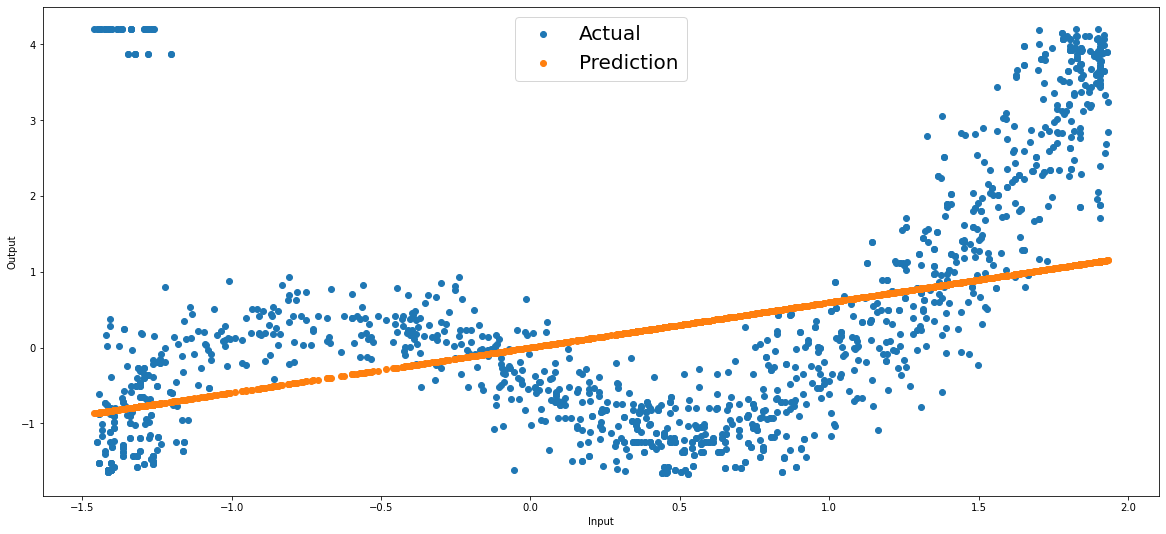

In [26]:
import matplotlib.pyplot as plt
plot = plt.figure(figsize = (20, 9))
p2 = plt.scatter(x_test_ss, y_test_ss)
p1 = plt.scatter(x_test_ss, result)
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(['Actual', 'Prediction'], loc = 'upper center', fontsize = 20)
plt.show()